<a href="https://colab.research.google.com/github/Benjaminzzerpa/Benjamin-Zerpa/blob/main/An%C3%A1lise_Multivariada_Explora%C3%A7%C3%A3o_Mineral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy-financial


Probabilidade de TIR ≥ 15%: 100.00%


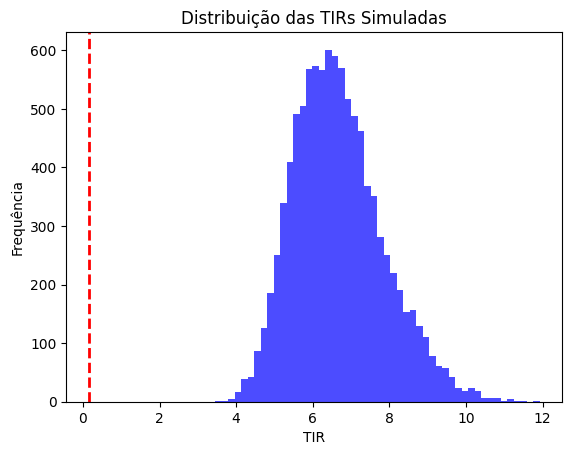

In [ ]:
import numpy as np
from scipy.stats import norm, triang, uniform
from numpy_financial import irr

# 1. Definir as distribuições das variáveis
np.random.seed(42)  # Para resultados reproduzíveis

# Preço do metal (distribuição normal)
preco_metal = norm.rvs(loc=2000, scale=200, size=10000)

# Capex (distribuição triangular)
capex = triang.rvs(c=(15-10)/(20-10), loc=10, scale=10, size=10000) * 1e6

# Custo operacional (distribuição uniforme)
custo_operacional = uniform.rvs(loc=1e6, scale=1e6, size=10000)

# Produção e vida útil constantes
producao_anual = 50000
vida_util = 10

# 2. Simular os cenários e calcular a TIR
tirs = []

for i in range(10000):
    receita_anual = producao_anual * preco_metal[i]
    fluxo_de_caixa = [-(capex[i])] + [receita_anual - custo_operacional[i]] * vida_util
    tir_projeto = irr(fluxo_de_caixa)
    tirs.append(tir_projeto)

# 3. Analisar os resultados
tirs = np.array(tirs)
probabilidade_tir_maior_15 = np.mean(tirs >= 0.15)

print(f"Probabilidade de TIR ≥ 15%: {probabilidade_tir_maior_15 * 100:.2f}%")

# Distribuição das TIRs simuladas
import matplotlib.pyplot as plt

plt.hist(tirs, bins=50, color='blue', alpha=0.7)
plt.axvline(0.15, color='red', linestyle='dashed', linewidth=2)
plt.title("Distribuição das TIRs Simuladas")
plt.xlabel("TIR")
plt.ylabel("Frequência")
plt.show()


In [ ]:
import numpy as np
from scipy.optimize import minimize
import numpy_financial as npf

# Função para calcular a TIR
def calcular_tir(preco_metal, capex, custo_operacional, producao_anual, vida_util):
    receita_anual = producao_anual * preco_metal
    fluxo_de_caixa = [-capex] + [receita_anual - custo_operacional] * vida_util
    tir = npf.irr(fluxo_de_caixa)
    return tir

# Função objetivo para otimização (objetivo: maximizar a TIR)
def objetivo(variaveis):
    preco_metal, capex, custo_operacional = variaveis
    tir = calcular_tir(preco_metal, capex, custo_operacional, producao_anual=50000, vida_util=10)
    return -tir  # Minimizar o negativo da TIR é equivalente a maximizar a TIR

# Restrições (exemplo: garantir TIR >= 15%)
def restricao(variaveis):
    preco_metal, capex, custo_operacional = variaveis
    tir = calcular_tir(preco_metal, capex, custo_operacional, producao_anual=50000, vida_util=10)
    return tir - 0.15  # Queremos TIR >= 15%

# Limites para as variáveis (ajustados conforme seus requisitos)
limites = [(2200, 2500),  # Limites para preço do metal (por exemplo, não menor que 2200)
           (10e6, 30e6),  # Limites para capex
           (1e6, 3e6)]    # Limites para custo operacional

# Ponto inicial (chute inicial para as variáveis)
ponto_inicial = [2200, 20e6, 2e6]

# Otimização
resultado = minimize(objetivo, ponto_inicial, bounds=limites, constraints={'type': 'ineq', 'fun': restricao})

# Resultados
print("Melhores variáveis encontradas:")
print(f"Preço do metal: {resultado.x[0]:.2f} USD/tonelada")
print(f"Capex: {resultado.x[1]:.2f} USD")
print(f"Custo operacional: {resultado.x[2]:.2f} USD/ano")
print(f"TIR resultante: {-resultado.fun:.4f}")


Melhores variáveis encontradas:
Preço do metal: 2500.00 USD/tonelada
Capex: 19999999.95 USD
Custo operacional: 2000000.00 USD/ano
TIR resultante: 6.1500


In [ ]:
import numpy as np
import numpy_financial as npf

# Função para calcular a TIR
def calcular_tir(preco_metal, capex, custo_operacional, producao_anual, vida_util, taxa_impostos, receitas_adicionais=0):
    receita_anual_bruta = producao_anual * preco_metal + receitas_adicionais
    receita_anual_liquida = receita_anual_bruta * (1 - taxa_impostos)
    fluxo_de_caixa = [-capex] + [receita_anual_liquida - custo_operacional] * vida_util
    tir = npf.irr(fluxo_de_caixa)
    return tir

# Função para Simulação de Monte Carlo
def simulacao_monte_carlo(num_simulacoes):
    resultados_tir = []
    for _ in range(num_simulacoes):
        preco_metal = np.random.uniform(2200, 2500)
        capex = np.random.uniform(10e6, 30e6)
        custo_operacional = np.random.uniform(1e6, 3e6)
        producao_anual = np.random.uniform(30000, 70000)
        taxa_impostos = np.random.uniform(0.1, 0.35)
        receitas_adicionais = np.random.uniform(0, 5e6)
        tir = calcular_tir(preco_metal, capex, custo_operacional, producao_anual, vida_util=10, taxa_impostos=taxa_impostos, receitas_adicionais=receitas_adicionais)
        resultados_tir.append(tir)
    return resultados_tir

# Executar Simulação de Monte Carlo
num_simulacoes = 10000
resultados_tir = simulacao_monte_carlo(num_simulacoes)

# Analisar os resultados
tir_media = np.mean(resultados_tir)
tir_15 = np.sum(np.array(resultados_tir) >= 0.15) / num_simulacoes * 100

print(f"TIR média das simulações: {tir_media:.4f}")
print(f"Percentual de cenários com TIR >= 15%: {tir_15:.2f}%")


TIR média das simulações: 4.9920
Percentual de cenários com TIR >= 15%: 100.00%


Área estimada do círculo: 3.1268


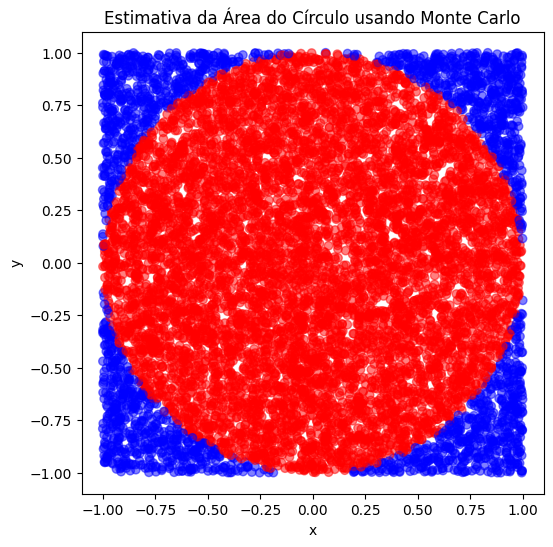

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função para estimar a área do círculo usando Monte Carlo
def monte_carlo_circle_estimation(num_samples):
    # Gera pontos aleatórios no intervalo [-1, 1]
    x = np.random.uniform(-1, 1, num_samples)
    y = np.random.uniform(-1, 1, num_samples)

    # Calcula a distância dos pontos à origem
    distance = x**2 + y**2

    # Conta quantos pontos estão dentro do círculo
    inside_circle = distance <= 1

    # Estima a área do círculo
    area_estimate = 4 * np.sum(inside_circle) / num_samples
    return area_estimate

# Número de amostras
num_samples = 10000

# Estima a área do círculo
estimated_area = monte_carlo_circle_estimation(num_samples)
print(f"Área estimada do círculo: {estimated_area}")

# Visualiza os pontos
x = np.random.uniform(-1, 1, num_samples)
y = np.random.uniform(-1, 1, num_samples)
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c=(x**2 + y**2 <= 1), cmap='bwr', alpha=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Estimativa da Área do Círculo usando Monte Carlo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
import numpy as np

# Função para calcular a TIR (Taxa Interna de Retorno) de um projeto
def calculate_irr(cash_flows):
    from scipy.optimize import newton
    def npv(irr):
        return np.sum(cash_flows / (1 + irr)**np.arange(len(cash_flows)))
    return newton(npv, 0.1)

# Função para simular a TIR usando Monte Carlo
def monte_carlo_tir_simulation(num_simulations, price_mean, price_std, cost_mean, cost_std, capex, opex):
    tir_results = []
    for _ in range(num_simulations):
        # Simula o preço do metal e o custo de produção
        price = np.random.normal(price_mean, price_std)
        cost = np.random.normal(cost_mean, cost_std)

        # Define o fluxo de caixa para o projeto
        cash_flows = [-capex] + [price - cost - opex] * 10  # Assume um período de 10 anos

        # Calcula a TIR para este cenário
        irr = calculate_irr(np.array(cash_flows))
        tir_results.append(irr)

    return np.array(tir_results)

# Parâmetros do projeto
num_simulations = 10000
price_mean = 2500  # Preço médio do metal
price_std = 500    # Desvio padrão do preço do metal
cost_mean = 1000   # Custo médio de produção
cost_std = 200     # Desvio padrão do custo de produção
capex = 50000      # CAPEX inicial
opex = 5000        # Custo operacional anual

# Simulação
tir_results = monte_carlo_tir_simulation(num_simulations, price_mean, price_std, cost_mean, cost_std, capex, opex)

# Estimativa da probabilidade de TIR ser maior ou igual a 15%
probability_of_high_tir = np.mean(tir_results >= 0.15)
print(f"Probabilidade de obter uma TIR de pelo menos 15%: {probability_of_high_tir:.2%}")

# Resultados das simulações
import matplotlib.pyplot as plt

plt.hist(tir_results, bins=50, edgecolor='black')
plt.axvline(0.15, color='red', linestyle='dashed', linewidth=1, label='15% TIR')
plt.xlabel('TIR')
plt.ylabel('Frequência')
plt.title('Distribuição da TIR em Simulações de Monte Carlo')
plt.legend()
plt.show()


RuntimeError: Tolerance of 6.475173431784727e+28 reached. Failed to converge after 9 iterations, value is 6.47517343180866e+28.

In [ ]:
import numpy as np
from itertools import product

# Função para calcular a TIR (simulada)
def calcular_tir(variaveis):
    # Aqui você implementaria o cálculo da TIR baseado nas variáveis fornecidas
    return np.random.uniform(5, 20)

# Função para gerar a matriz de resultados com intervalos distintos
def gerar_matriz(variaveis, intervalos):
    # Gera os valores possíveis para cada variável com base nos intervalos definidos
    variaveis_valores = [np.linspace(min_val, max_val, num_intervals) for min_val, max_val, num_intervals in intervalos]

    # Gera todas as combinações das variáveis
    combinacoes = list(product(*variaveis_valores))

    # Inicializa a matriz de resultados
    matriz_resultados = np.zeros((len(combinacoes), len(variaveis) + 1))

    # Preenche a matriz com os resultados da TIR para cada combinação de variáveis
    for i, combinacao in enumerate(combinacoes):
        tir = calcular_tir(combinacao)
        matriz_resultados[i, :-1] = combinacao
        matriz_resultados[i, -1] = tir

    return matriz_resultados

# Exemplo de uso
variaveis = ['Preço do Metal', 'Capex', 'Custos de Produção']
intervalos = [
    (2200, 2300, 5),    # Preço do Metal: 5 intervalos entre 2200 e 2300
    (1000000, 3000000, 5),  # Capex: 5 intervalos entre 1M e 3M
    (600000, 800000, 5)   # Custos de Produção: 5 intervalos entre 600k e 800k
]

matriz_resultados = gerar_matriz(variaveis, intervalos)
print("Matriz de resultados:")
print(matriz_resultados)


Matriz de resultados:
[[2.20000000e+03 1.00000000e+06 6.00000000e+05 1.72699183e+01]
 [2.20000000e+03 1.00000000e+06 6.50000000e+05 1.58381972e+01]
 [2.20000000e+03 1.00000000e+06 7.00000000e+05 1.52410539e+01]
 [2.20000000e+03 1.00000000e+06 7.50000000e+05 1.01941999e+01]
 [2.20000000e+03 1.00000000e+06 8.00000000e+05 6.44446193e+00]
 [2.20000000e+03 1.50000000e+06 6.00000000e+05 1.55852703e+01]
 [2.20000000e+03 1.50000000e+06 6.50000000e+05 7.12678536e+00]
 [2.20000000e+03 1.50000000e+06 7.00000000e+05 1.23512172e+01]
 [2.20000000e+03 1.50000000e+06 7.50000000e+05 1.77445077e+01]
 [2.20000000e+03 1.50000000e+06 8.00000000e+05 1.41535291e+01]
 [2.20000000e+03 2.00000000e+06 6.00000000e+05 1.86911216e+01]
 [2.20000000e+03 2.00000000e+06 6.50000000e+05 1.07018548e+01]
 [2.20000000e+03 2.00000000e+06 7.00000000e+05 1.38565205e+01]
 [2.20000000e+03 2.00000000e+06 7.50000000e+05 1.46451998e+01]
 [2.20000000e+03 2.00000000e+06 8.00000000e+05 6.68601730e+00]
 [2.20000000e+03 2.50000000e+06 6

In [ ]:
import numpy as np
import pandas as pd
from itertools import product

# Função para calcular a TIR (simulada)
def calcular_tir(variaveis):
    return np.random.uniform(5, 20)

# Função para gerar a matriz de resultados com intervalos distintos
def gerar_matriz(variaveis, intervalos):
    variaveis_valores = [np.linspace(min_val, max_val, num_intervals) for min_val, max_val, num_intervals in intervalos]

    combinacoes = list(product(*variaveis_valores))

    resultados = []
    for combinacao in combinacoes:
        tir = calcular_tir(combinacao)
        resultados.append(combinacao + (tir,))

    colunas = variaveis + ['TIR']
    df_resultados = pd.DataFrame(resultados, columns=colunas)

    return df_resultados

# Exemplo de uso
variaveis = ['Preço do Metal', 'Capex', 'Custos de Produção']
intervalos = [
    (2200, 2300, 5),
    (1000000, 3000000, 5),
    (600000, 800000, 5)
]

df_resultados = gerar_matriz(variaveis, intervalos)

# Mostrar os primeiros resultados
print("Primeiros resultados:")
print(df_resultados.head())

# Salvar em CSV para análise posterior
df_resultados.to_csv('resultados_tir.csv', index=False)
print("Resultados salvos em 'resultados_tir.csv'")


Primeiros resultados:
   Preço do Metal      Capex  Custos de Produção        TIR
0          2200.0  1000000.0            600000.0   7.463848
1          2200.0  1000000.0            650000.0  19.489469
2          2200.0  1000000.0            700000.0   9.754247
3          2200.0  1000000.0            750000.0   5.633364
4          2200.0  1000000.0            800000.0  18.209993
Resultados salvos em 'resultados_tir.csv'


In [ ]:
variaveis = [
    {
        'nome': 'Preço medio do Metal',
        'min': 2500,
        'max': 3000,
        'intervalos': 3
    },
    {
        'nome': 'Capex',
        'min': 400000000,
        'max': 800000000,
        'intervalos': 3
    },
    {
        'nome': 'Capex Sustaining',
        'min': 40000000,
        'max': 70000000,
        'intervalos': 3
    },
    {
        'nome': 'Preço do Concentrado',
        'min': 250,
        'max': 300,
        'intervalos': 3
    },
    {
        'nome': 'Mining Costs',
        'min': 150000000,
        'max': 250000000,
        'intervalos': 3
    },
    {
        'nome': 'Mill Capacity',
        'min': 5000000,
        'max': 15000000,
        'intervalos': 3
    },
    {
        'nome': 'Ore grades',
        'min': 0.05,
        'max': 0.15,
        'intervalos': 3
    },
    {
        'nome': 'Recovery',
        'min': 0.7,
        'max': 0.9,
        'intervalos': 3
    },
    {
        'nome': 'Concentrate grade',
        'min': 0.5,
        'max': 0.7,
        'intervalos': 3
    },
    {
        'nome': 'Processing Costs',
        'min': 120000000,
        'max': 130000000,
        'intervalos': 3
    }
]

In [ ]:
import numpy as np

def gerar_valores(variaveis):
    variaveis_valores = []
    for var in variaveis:
        valores = np.linspace(var['min'], var['max'], var['intervalos'])
        variaveis_valores.append(valores)
    return variaveis_valores

variaveis_valores = gerar_valores(variaveis)
print(variaveis_valores)

[array([2500., 2750., 3000.]), array([4.e+08, 6.e+08, 8.e+08]), array([40000000., 55000000., 70000000.]), array([250., 275., 300.]), array([1.5e+08, 2.0e+08, 2.5e+08]), array([ 5000000., 10000000., 15000000.]), array([0.05, 0.1 , 0.15]), array([0.7, 0.8, 0.9]), array([0.5, 0.6, 0.7]), array([1.20e+08, 1.25e+08, 1.30e+08])]


In [ ]:
from itertools import product

combinacoes = list(product(*variaveis_valores))
print(f"Número de combinações: {len(combinacoes)}")

Número de combinações: 59049


In [ ]:
def calcular_tir(variaveis):
    # Implementar o cálculo real da TIR
    # Aqui está uma simulação
    return np.random.uniform(5, 20)


In [7]:
!pip install numpy-financial


In [9]:
from numpy_financial import irr


def calcular_ore(mill_capacity, operation_rate):
    return mill_capacity * operation_rate

def calcular_contained_metal_zn(ore, ore_grade_zn):
    return ore * ore_grade_zn

def calcular_metal_produced_in_zn_circuit(contained_metal_zn, recovery_zn_concentrate):
    return contained_metal_zn * recovery_zn_concentrate

def calcular_mass_zn(metal_produced_in_zn_circuit, zn_yield):
    return metal_produced_in_zn_circuit / zn_yield

def calcular_zn_concentrate_revenue(selling_price, mass):
    return selling_price * mass / 1000

def calcular_pb_concentrate_revenue(selling_price, mass):
    return selling_price * mass / 1000

def calcular_cu_concentrate_revenue(selling_price, mass):
    return selling_price * mass / 1000

def calcular_net_revenues(zn_concentrate_revenue, pb_concentrate_revenue, cu_concentrate_revenue):
  return sum([zn_concentrate_revenue, pb_concentrate_revenue, cu_concentrate_revenue])

def calcular_accounts_receivable(net_revenues, days):
  return (net_revenues * days) / 365

def calcular_working_capital_investments(accounts_receivable, inventories, accounts_payable, previus_year_value):
    working_capital_investments = accounts_receivable + inventories - accounts_payable
    return working_capital_investments - previus_year_value

def calcular_mill_capacity(mill_capacity_inicial, dias_por_ano, ano_inicial, ano_final):
    mill_capacity = mill_capacity_inicial / dias_por_ano / ((ano_inicial + 1) - ano_final) / 1000
    return mill_capacity

def calcular_capex_sustaining(mill_capacity, sustaining, mill_capacity_rate):
    capex_sustaining = (mill_capacity * sustaining) / mill_capacity_rate
    return capex_sustaining

def calcular_capex_implementation(capex_inicial, first_capex_year, last_capex_year):
    capex_implementation = capex_inicial / (last_capex_year - first_capex_year + 1)
    return capex_implementation

def calcular_capex(implementation, sustaining):
    capex = sum([implementation, sustaining])
    return -capex

def calcular_fcf(capex, working_capital_investments, d_and_a, nopad):
    fcf = sum([capex, working_capital_investments, d_and_a, nopad])
    return fcf

def calcular_tir_real(fcf):
    tir = irr(fcf)
    return tir


calcular_net_revenues(zn_concentrate_Revenue=152.7, pb_concentrate_revenue=19.9, cu_concentrate_revenue=0)


172.6

In [ ]:
import pandas as pd

def gerar_matriz(variaveis, combinacoes):
    resultados = []
    for combinacao in combinacoes:
        tir = calcular_tir(combinacao)
        resultados.append(list(combinacao) + [tir])

    colunas = [var['nome'] for var in variaveis] + ['TIR']
    df_resultados = pd.DataFrame(resultados, columns=colunas)

    return df_resultados

df_resultados = gerar_matriz(variaveis, combinacoes)
print(df_resultados.head())


   Preço medio do Metal        Capex  Capex Sustaining  Preço do Concentrado  \
0                2500.0  400000000.0        40000000.0                 250.0   
1                2500.0  400000000.0        40000000.0                 250.0   
2                2500.0  400000000.0        40000000.0                 250.0   
3                2500.0  400000000.0        40000000.0                 250.0   
4                2500.0  400000000.0        40000000.0                 250.0   

   Mining Costs  Mill Capacity  Ore grades  Recovery  Concentrate grade  \
0   150000000.0      5000000.0        0.05       0.7                0.5   
1   150000000.0      5000000.0        0.05       0.7                0.5   
2   150000000.0      5000000.0        0.05       0.7                0.5   
3   150000000.0      5000000.0        0.05       0.7                0.6   
4   150000000.0      5000000.0        0.05       0.7                0.6   

   Processing Costs        TIR  
0       120000000.0   5.988506  
1 

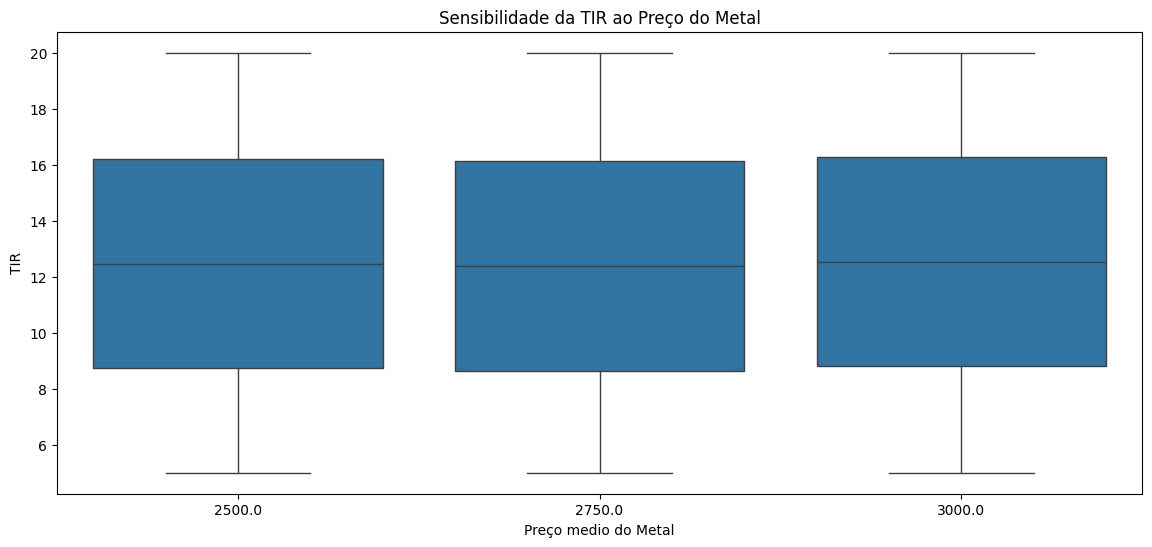

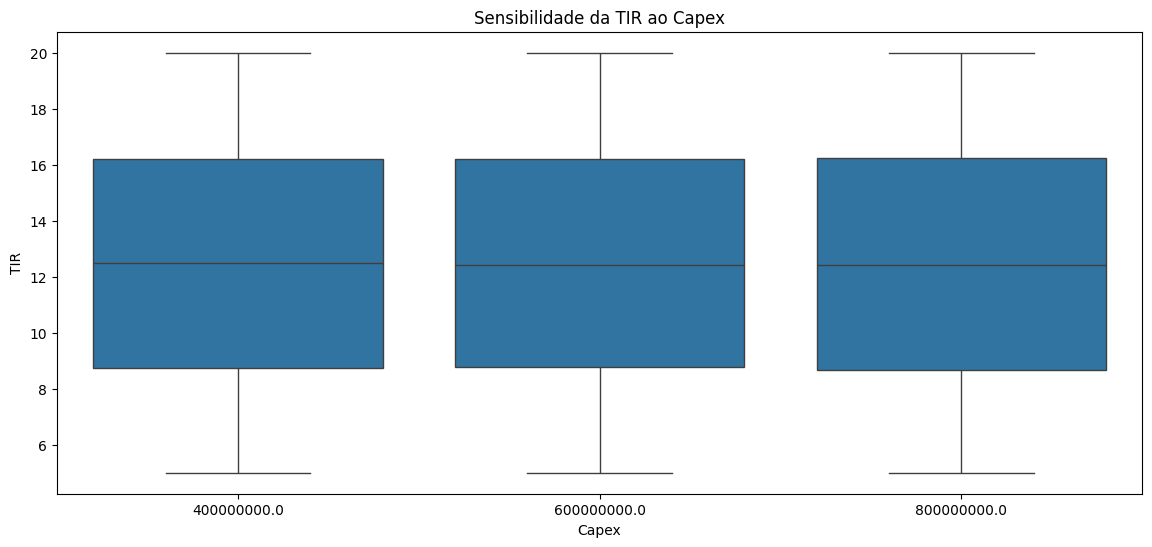

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar TIR vs Preço do Metal
plt.figure(figsize=(14, 6))
sns.boxplot(x='Preço medio do Metal', y='TIR', data=df_resultados)
plt.title('Sensibilidade da TIR ao Preço do Metal')
plt.show()

# Plotar TIR vs Capex
plt.figure(figsize=(14, 6))
sns.boxplot(x='Capex', y='TIR', data=df_resultados)
plt.title('Sensibilidade da TIR ao Capex')
plt.show()


In [ ]:
# Filtrar cenários com TIR > 15%
cenarios_otimos = df_resultados[df_resultados['TIR'] > 15]
print(cenarios_otimos)


       Preço medio do Metal        Capex  Capex Sustaining  \
1                    2500.0  400000000.0        40000000.0   
8                    2500.0  400000000.0        40000000.0   
9                    2500.0  400000000.0        40000000.0   
13                   2500.0  400000000.0        40000000.0   
15                   2500.0  400000000.0        40000000.0   
...                     ...          ...               ...   
59036                3000.0  800000000.0        70000000.0   
59038                3000.0  800000000.0        70000000.0   
59043                3000.0  800000000.0        70000000.0   
59046                3000.0  800000000.0        70000000.0   
59048                3000.0  800000000.0        70000000.0   

       Preço do Concentrado  Mining Costs  Mill Capacity  Ore grades  \
1                     250.0   150000000.0      5000000.0        0.05   
8                     250.0   150000000.0      5000000.0        0.05   
9                     250.0   150000000

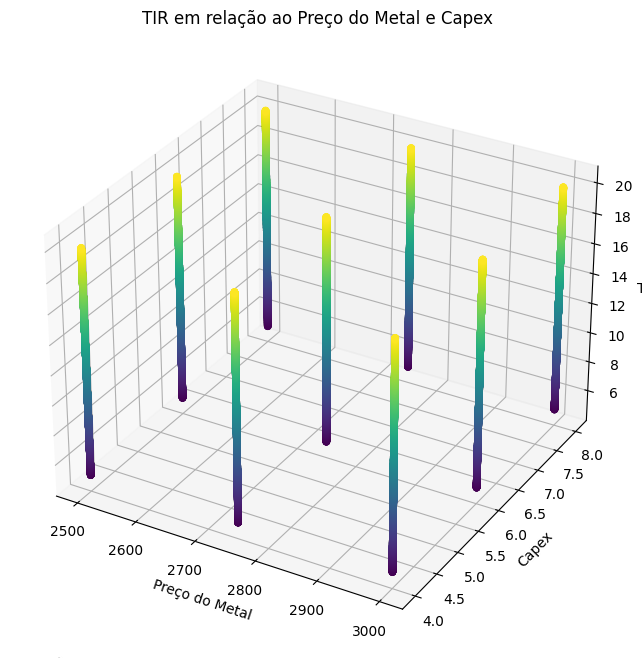

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Gráfico 3D de TIR em relação a duas variáveis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_resultados['Preço medio do Metal'], df_resultados['Capex'], df_resultados['TIR'], c=df_resultados['TIR'], cmap='viridis')
ax.set_xlabel('Preço do Metal')
ax.set_ylabel('Capex')
ax.set_zlabel('TIR')
plt.title('TIR em relação ao Preço do Metal e Capex')
plt.show()


In [ ]:
df_resultados.to_csv('resultados_tir.csv', index=False)
print("Resultados salvos em 'resultados_tir.csv'")


Resultados salvos em 'resultados_tir.csv'
